<a href="https://colab.research.google.com/github/kumarshivam99/EDA_using_python/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### FEATURES
The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
url='https://raw.githubusercontent.com/kumarshivam99/Datasets/main/economy.csv'
df=pd.read_csv(url)
df.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
33258,17-03-2022,Vistara,UK,817,16:05,Delhi,17h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"5,761"
180514,30-03-2022,Vistara,UK,876,21:35,Hyderabad,22h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Chennai,"6,287"
35611,14-02-2022,Vistara,UK,839,13:30,Delhi,02h 50m,non-stop,16:20,Chennai,"7,425"
191650,14-03-2022,Vistara,UK,836,10:45,Chennai,13h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:50,Mumbai,"4,413"
101301,23-03-2022,Air India,AI,804,06:10,Bangalore,16h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:10,Mumbai,"6,578"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


### 3. Checks for Data Cleaning

- Check Duplicates
- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check for outliers
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
df.duplicated().sum()

2

In [5]:
df[df.duplicated()]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
563,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,"12,150"
6181,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,"4,780"


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

**Observation:** Duplicate value has been removed

In [8]:
#Check for missing value
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

**Observation:** Their is no missing value

In [9]:
#checking for number of unique value
df.nunique()

date            49
airline          8
ch_code          8
num_code      1254
dep_time       251
from             6
time_taken     483
stop            37
arr_time       266
to               6
price         9819
dtype: int64

In [10]:
#checking for all the unique value for each columns
for i in range(0,len(df.columns)):
 print(df.columns[i],np.sort(df.iloc[:,i].unique()),"\n")

date ['01-03-2022' '02-03-2022' '03-03-2022' '04-03-2022' '05-03-2022'
 '06-03-2022' '07-03-2022' '08-03-2022' '09-03-2022' '10-03-2022'
 '11-02-2022' '11-03-2022' '12-02-2022' '12-03-2022' '13-02-2022'
 '13-03-2022' '14-02-2022' '14-03-2022' '15-02-2022' '15-03-2022'
 '16-02-2022' '16-03-2022' '17-02-2022' '17-03-2022' '18-02-2022'
 '18-03-2022' '19-02-2022' '19-03-2022' '20-02-2022' '20-03-2022'
 '21-02-2022' '21-03-2022' '22-02-2022' '22-03-2022' '23-02-2022'
 '23-03-2022' '24-02-2022' '24-03-2022' '25-02-2022' '25-03-2022'
 '26-02-2022' '26-03-2022' '27-02-2022' '27-03-2022' '28-02-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022'] 

airline ['Air India' 'AirAsia' 'GO FIRST' 'Indigo' 'SpiceJet' 'StarAir' 'Trujet'
 'Vistara'] 

ch_code ['2T' '6E' 'AI' 'G8' 'I5' 'S5' 'SG' 'UK'] 

num_code [ 101  102  103 ... 9939 9974 9991] 

dep_time ['00:10' '00:15' '00:25' '00:30' '00:45' '01:15' '02:00' '02:15' '02:30'
 '02:40' '03:00' '03:05' '03:20' '03:30' '03:55' '04:00' '04:15' '04:

**Observation:** Data required cleaning change of data type and creating new columns from existing one



In [11]:
#Data cleaing one by one
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [12]:
#Creating a new data rame and adding date by splinting it.
df_new=pd.DataFrame()
df_new['day']=df['date'].str.split('-').str[0]
df_new['month']=df['date'].str.split('-').str[1]
df_new['year']=df['date'].str.split('-').str[2]
df_new.head()

,day,month,year
0,11,02,2022
1,11,02,2022
2,11,02,2022
3,11,02,2022
4,11,02,2022


In [13]:
df_new['stop']=df['stop'].str.split("-").str[0]
df_new.head()

,day,month,year,stop
0,11,02,2022,non
1,11,02,2022,non
2,11,02,2022,non
3,11,02,2022,non
4,11,02,2022,non


In [14]:
df_new.head()

,day,month,year,stop
0,11,02,2022,non
1,11,02,2022,non
2,11,02,2022,non
3,11,02,2022,non
4,11,02,2022,non


In [15]:
df_new[['airline','ch_code','num_code']]=df[['airline','ch_code','num_code']]
df_new[['from','to','price']]=df[['from','to','price']]
df_new.head()

,day,month,year,stop,airline,ch_code,num_code,from,to,price
0,11,02,2022,non,SpiceJet,SG,8709,Delhi,Mumbai,"5,953"
1,11,02,2022,non,SpiceJet,SG,8157,Delhi,Mumbai,"5,953"
2,11,02,2022,non,AirAsia,I5,764,Delhi,Mumbai,"5,956"
3,11,02,2022,non,Vistara,UK,995,Delhi,Mumbai,"5,955"
4,11,02,2022,non,Vistara,UK,963,Delhi,Mumbai,"5,955"


In [16]:
df_new['dep_hr']=df['dep_time'].str.split(':').str[0]
df_new['dep_min']=df['dep_time'].str.split(':').str[1]
df_new.head()

,day,month,year,stop,airline,ch_code,num_code,from,to,price,dep_hr,dep_min
0,11,02,2022,non,SpiceJet,SG,8709,Delhi,Mumbai,"5,953",18,55
1,11,02,2022,non,SpiceJet,SG,8157,Delhi,Mumbai,"5,953",06,20
2,11,02,2022,non,AirAsia,I5,764,Delhi,Mumbai,"5,956",04,25
3,11,02,2022,non,Vistara,UK,995,Delhi,Mumbai,"5,955",10,20
4,11,02,2022,non,Vistara,UK,963,Delhi,Mumbai,"5,955",08,50


In [17]:
df_new.head()

,day,month,year,stop,airline,ch_code,num_code,from,to,price,dep_hr,dep_min
0,11,02,2022,non,SpiceJet,SG,8709,Delhi,Mumbai,"5,953",18,55
1,11,02,2022,non,SpiceJet,SG,8157,Delhi,Mumbai,"5,953",06,20
2,11,02,2022,non,AirAsia,I5,764,Delhi,Mumbai,"5,956",04,25
3,11,02,2022,non,Vistara,UK,995,Delhi,Mumbai,"5,955",10,20
4,11,02,2022,non,Vistara,UK,963,Delhi,Mumbai,"5,955",08,50


In [18]:
df_new['arr_hr']=df['arr_time'].str.split(':').str[0]
df_new['arr_min']=df['arr_time'].str.split(':').str[1]
df_new.head()

,day,month,year,stop,airline,ch_code,num_code,from,to,price,dep_hr,dep_min,arr_hr,arr_min
0,11,02,2022,non,SpiceJet,SG,8709,Delhi,Mumbai,"5,953",18,55,21,05
1,11,02,2022,non,SpiceJet,SG,8157,Delhi,Mumbai,"5,953",06,20,08,40
2,11,02,2022,non,AirAsia,I5,764,Delhi,Mumbai,"5,956",04,25,06,35
3,11,02,2022,non,Vistara,UK,995,Delhi,Mumbai,"5,955",10,20,12,35
4,11,02,2022,non,Vistara,UK,963,Delhi,Mumbai,"5,955",08,50,11,10


In [19]:
df['time_taken'].unique()

array(['02h 10m', '02h 20m', '02h 15m', '02h 05m', '12h 15m', '16h 20m',
       '11h 45m', '14h 30m', '15h 40m', '03h 45m', '02h 30m', '05h 50m',
       '08h 00m', '06h 00m', '14h 40m', '16h 10m', '18h 00m', '23h 10m',
       '24h 10m', '08h 50m', '04h 30m', '15h 15m', '11h 00m', '19h 05m',
       '22h 50m', '26h 25m', '17h 45m', '19h 35m', '26h 40m', '15h 10m',
       '20h 50m', '11h 25m', '22h 15m', '26h 00m', '21h 45m', '03h 50m',
       '04h 25m', '07h 40m', '08h 20m', '10h 25m', '23h 45m', '19h 30m',
       '06h 30m', '12h 25m', '21h 05m', '28h 10m', '28h 15m', '09h 15m',
       '17h 55m', '07h 05m', '13h 50m', '07h 35m', '15h 50m', '24h 25m',
       '04h 10m', '04h 15m', '05h 05m', '29h 20m', '17h 00m', '27h 10m',
       '24h 45m', '05h 45m', '12h 45m', '13h 45m', '17h 50m', '05h 30m',
       '23h 50m', '05h 00m', '26h 30m', '12h 50m', '08h 55m', '11h 10m',
       '12h 10m', '15h 35m', '15h 45m', '07h 55m', '13h 15m', '16h 00m',
       '22h 45m', '06h 20m', '07h 15m', '30h 05m', 

In [20]:
df[(df['time_taken']=='1.01h m') | (df['time_taken']=='1.02h m') | (df['time_taken']=='1.03h m')]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
96486,26-02-2022,GO FIRST,G8,146,05:45,Bangalore,1.03h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:10,Mumbai,"5,177"
104676,26-02-2022,GO FIRST,G8,146,05:45,Bangalore,1.02h m,2+-stop,08:00,Kolkata,"5,177"
111315,26-02-2022,GO FIRST,G8,146,05:45,Bangalore,1.03h m,2+-stop,09:30,Hyderabad,"4,337"
154007,25-02-2022,GO FIRST,G8,517,20:45,Hyderabad,1.01h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:50,Delhi,"6,132"


In [21]:
df_new['time_taken']=df['time_taken']

In [22]:
df_new.drop([154007,104676,96486,111315],inplace =True)

In [23]:
df_new.head()

,day,month,year,stop,airline,ch_code,num_code,from,to,price,dep_hr,dep_min,arr_hr,arr_min,time_taken
0,11,02,2022,non,SpiceJet,SG,8709,Delhi,Mumbai,"5,953",18,55,21,05,02h 10m
1,11,02,2022,non,SpiceJet,SG,8157,Delhi,Mumbai,"5,953",06,20,08,40,02h 20m
2,11,02,2022,non,AirAsia,I5,764,Delhi,Mumbai,"5,956",04,25,06,35,02h 10m
3,11,02,2022,non,Vistara,UK,995,Delhi,Mumbai,"5,955",10,20,12,35,02h 15m
4,11,02,2022,non,Vistara,UK,963,Delhi,Mumbai,"5,955",08,50,11,10,02h 20m


In [24]:
df_new['time_taken_hr']=df['time_taken'].str.split('h').str[0]
df_new['time_taken_min']=df['time_taken'].str.split(' ').str[1]
df_new.head()

,day,month,year,stop,airline,ch_code,num_code,from,to,price,dep_hr,dep_min,arr_hr,arr_min,time_taken,time_taken_hr,time_taken_min
0,11,02,2022,non,SpiceJet,SG,8709,Delhi,Mumbai,"5,953",18,55,21,05,02h 10m,02,10m
1,11,02,2022,non,SpiceJet,SG,8157,Delhi,Mumbai,"5,953",06,20,08,40,02h 20m,02,20m
2,11,02,2022,non,AirAsia,I5,764,Delhi,Mumbai,"5,956",04,25,06,35,02h 10m,02,10m
3,11,02,2022,non,Vistara,UK,995,Delhi,Mumbai,"5,955",10,20,12,35,02h 15m,02,15m
4,11,02,2022,non,Vistara,UK,963,Delhi,Mumbai,"5,955",08,50,11,10,02h 20m,02,20m


In [25]:
df_new['time_taken_min'].unique()

array(['10m', '20m', '15m', '05m', '45m', '30m', '40m', '50m', '00m',
       '25m', '35m', '55m', '04m', '59m', '24m'], dtype=object)

In [26]:
df_new['time_taken_min'] = df_new['time_taken_min'].str[:-1]
df_new.drop(columns=['time_taken'], inplace=True)
df_new.head()

,day,month,year,stop,airline,ch_code,num_code,from,to,price,dep_hr,dep_min,arr_hr,arr_min,time_taken_hr,time_taken_min
0,11,02,2022,non,SpiceJet,SG,8709,Delhi,Mumbai,"5,953",18,55,21,05,02,10
1,11,02,2022,non,SpiceJet,SG,8157,Delhi,Mumbai,"5,953",06,20,08,40,02,20
2,11,02,2022,non,AirAsia,I5,764,Delhi,Mumbai,"5,956",04,25,06,35,02,10
3,11,02,2022,non,Vistara,UK,995,Delhi,Mumbai,"5,955",10,20,12,35,02,15
4,11,02,2022,non,Vistara,UK,963,Delhi,Mumbai,"5,955",08,50,11,10,02,20


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206768 entries, 0 to 206773
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   day             206768 non-null  object
 1   month           206768 non-null  object
 2   year            206768 non-null  object
 3   stop            206768 non-null  object
 4   airline         206768 non-null  object
 5   ch_code         206768 non-null  object
 6   num_code        206768 non-null  int64 
 7   from            206768 non-null  object
 8   to              206768 non-null  object
 9   price           206768 non-null  object
 10  dep_hr          206768 non-null  object
 11  dep_min         206768 non-null  object
 12  arr_hr          206768 non-null  object
 13  arr_min         206768 non-null  object
 14  time_taken_hr   206768 non-null  object
 15  time_taken_min  206768 non-null  object
dtypes: int64(1), object(15)
memory usage: 26.8+ MB


In [29]:
#Change the data type
df_new['day']=df_new['day'].astype('int')
df_new['month']=df_new['month'].astype('int')
df_new['year']=df_new['year'].astype('int')
df_new['num_code']=df_new['num_code'].astype('str')
df_new['dep_hr']=df_new['dep_hr'].astype('int')
df_new['dep_min']=df_new['dep_min'].astype('int')
df_new['arr_hr']=df_new['arr_hr'].astype('int')
df_new['arr_min']=df_new['arr_min'].astype('int')
df_new['time_taken_hr']=df_new['time_taken_hr'].astype('int')
df_new['time_taken_min']=df_new['time_taken_min'].astype('int')

In [30]:
df_new['p1']=df_new['price'].str.split(',').str[0].astype(int)
df_new['price']=df_new['p1']*1000+df_new['price'].str.split(',').str[1].astype(int)
df_new.head()

,day,month,year,stop,airline,ch_code,num_code,from,to,price,dep_hr,dep_min,arr_hr,arr_min,time_taken_hr,time_taken_min,p1
0,11,2,2022,non,SpiceJet,SG,8709,Delhi,Mumbai,5953,18,55,21,5,2,10,5
1,11,2,2022,non,SpiceJet,SG,8157,Delhi,Mumbai,5953,6,20,8,40,2,20,5
2,11,2,2022,non,AirAsia,I5,764,Delhi,Mumbai,5956,4,25,6,35,2,10,5
3,11,2,2022,non,Vistara,UK,995,Delhi,Mumbai,5955,10,20,12,35,2,15,5
4,11,2,2022,non,Vistara,UK,963,Delhi,Mumbai,5955,8,50,11,10,2,20,5


In [31]:
df_new['flight']=df_new['ch_code']+df_new['num_code']

In [32]:
df_new.drop(columns=['p1','ch_code','num_code'],inplace=True)

In [33]:
df_new.head()

,day,month,year,stop,airline,from,to,price,dep_hr,dep_min,arr_hr,arr_min,time_taken_hr,time_taken_min,flight
0,11,2,2022,non,SpiceJet,Delhi,Mumbai,5953,18,55,21,5,2,10,SG8709
1,11,2,2022,non,SpiceJet,Delhi,Mumbai,5953,6,20,8,40,2,20,SG8157
2,11,2,2022,non,AirAsia,Delhi,Mumbai,5956,4,25,6,35,2,10,I5764
3,11,2,2022,non,Vistara,Delhi,Mumbai,5955,10,20,12,35,2,15,UK995
4,11,2,2022,non,Vistara,Delhi,Mumbai,5955,8,50,11,10,2,20,UK963


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206768 entries, 0 to 206773
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   day             206768 non-null  int64 
 1   month           206768 non-null  int64 
 2   year            206768 non-null  int64 
 3   stop            206768 non-null  object
 4   airline         206768 non-null  object
 5   from            206768 non-null  object
 6   to              206768 non-null  object
 7   price           206768 non-null  int64 
 8   dep_hr          206768 non-null  int64 
 9   dep_min         206768 non-null  int64 
 10  arr_hr          206768 non-null  int64 
 11  arr_min         206768 non-null  int64 
 12  time_taken_hr   206768 non-null  int64 
 13  time_taken_min  206768 non-null  int64 
 14  flight          206768 non-null  object
dtypes: int64(10), object(5)
memory usage: 25.2+ MB


In [35]:
df_new.reset_index(drop=True,inplace=True)
df_new.head()

,day,month,year,stop,airline,from,to,price,dep_hr,dep_min,arr_hr,arr_min,time_taken_hr,time_taken_min,flight
0,11,2,2022,non,SpiceJet,Delhi,Mumbai,5953,18,55,21,5,2,10,SG8709
1,11,2,2022,non,SpiceJet,Delhi,Mumbai,5953,6,20,8,40,2,20,SG8157
2,11,2,2022,non,AirAsia,Delhi,Mumbai,5956,4,25,6,35,2,10,I5764
3,11,2,2022,non,Vistara,Delhi,Mumbai,5955,10,20,12,35,2,15,UK995
4,11,2,2022,non,Vistara,Delhi,Mumbai,5955,8,50,11,10,2,20,UK963


### 1. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column
- Check Visualization
- Check Correlation of diffrent columns
- Check freature selection
- Check freature scaling
- Check Data encoding

In [36]:
#checking for duplicates
df_new.duplicated().sum()

0

**Observation:** No duplicate value

In [37]:
#checking the unique value
df_new.nunique()

day                 31
month                2
year                 1
stop                 3
airline              8
from                 6
to                   6
price             9819
dep_hr              24
dep_min             12
arr_hr              24
arr_min             13
time_taken_hr       47
time_taken_min      15
flight            1568
dtype: int64

In [38]:
#checking for all the unique value for each columns
for i in range(0,len(df_new.columns)):
 print(df_new.columns[i],np.sort(df_new.iloc[:,i].unique()),"\n")

day [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] 

month [2 3] 

year [2022] 

stop ['1' '2+' 'non'] 

airline ['Air India' 'AirAsia' 'GO FIRST' 'Indigo' 'SpiceJet' 'StarAir' 'Trujet'
 'Vistara'] 

from ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai'] 

to ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai'] 

price [ 1105  1106  1443 ... 37646 40354 42349] 

dep_hr [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 

dep_min [ 0  5 10 15 20 25 30 35 40 45 50 55] 

arr_hr [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 

arr_min [ 0  5 10 15 20 25 30 35 40 45 50 55 59] 

time_taken_hr [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 47 49] 

time_taken_min [ 0  4  5 10 15 20 24 25 30 35 40 45 50 55 59] 

flight ['2T515' '2T518' '2T621' ... 'UK994' 'UK995' 'UK996'] 



In [39]:
#checking for stats
df_new.describe()

,day,month,year,price,dep_hr,dep_min,arr_hr,arr_min,time_taken_hr,time_taken_min
count,206768.000000,206768.000000,206768.0,206768.000000,206768.000000,206768.000000,206768.000000,206768.000000,206768.000000,206768.000000
mean,17.380629,2.669388,2022.0,6571.198798,12.844604,26.855292,15.036258,28.987899,11.099909,26.754406
std,8.104369,0.470435,0.0,3743.469114,5.359384,17.783350,6.230906,18.254342,7.246604,17.372348
min,1.000000,2.000000,2022.0,1105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2.000000,2022.0,4173.000000,8.000000,10.000000,10.000000,15.000000,6.000000,10.000000
50%,18.000000,3.000000,2022.0,5772.000000,12.000000,30.000000,17.000000,30.000000,10.000000,25.000000
75%,24.000000,3.000000,2022.0,7746.000000,18.000000,45.000000,20.000000,45.000000,15.000000,40.000000
max,31.000000,3.000000,2022.0,42349.000000,23.000000,55.000000,23.000000,59.000000,49.000000,59.000000


In [40]:
#segrregate numerical and categorical features
numerical_features=[feature for feature in df_new.columns if df_new[feature].dtype!='O']
categorical_feature=[feature for feature in df_new.columns if df_new[feature].dtype=='O']
print(numerical_features)
print(categorical_feature)

['day', 'month', 'year', 'price', 'dep_hr', 'dep_min', 'arr_hr', 'arr_min', 'time_taken_hr', 'time_taken_min']
['stop', 'airline', 'from', 'to', 'flight']


In [41]:
numerical_features

['day',
 'month',
 'year',
 'price',
 'dep_hr',
 'dep_min',
 'arr_hr',
 'arr_min',
 'time_taken_hr',
 'time_taken_min']

In [42]:
categorical_feature

['stop', 'airline', 'from', 'to', 'flight']

### 4. Checks for EDA

- Do univariant analysis
- Do Multivariant analysis
- Check for KPI

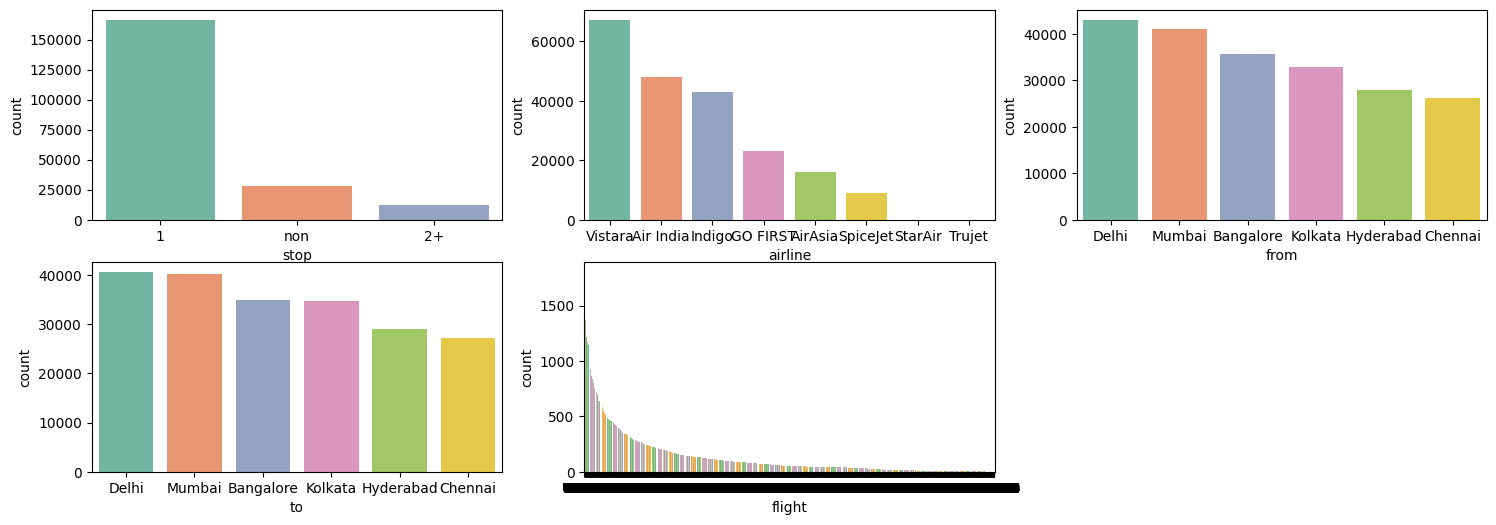

In [43]:
#percentage of diff category
cat_count=len(categorical_feature)
cat_row=int(np.ceil(cat_count/3)) #taking the celing value
fig, axes = plt.subplots(cat_row, 3,  figsize=(18, 6))

axes = axes.flatten()

for i in range(cat_count+1):
  if i < cat_count:
   plt.sca(axes[i])
   #plt.pie(df[categorical_feature[i]].value_counts(), labels=df[categorical_feature[i]].unique(), autopct='%.0f%%')
   sns.countplot(df_new, x= categorical_feature[i], palette='Set2',  order=df_new[categorical_feature[i]].value_counts().index)
   axes[i].set_xlabel(categorical_feature[i])

  else:
    axes[i].axis('off')

<Axes: xlabel='airline', ylabel='count'>

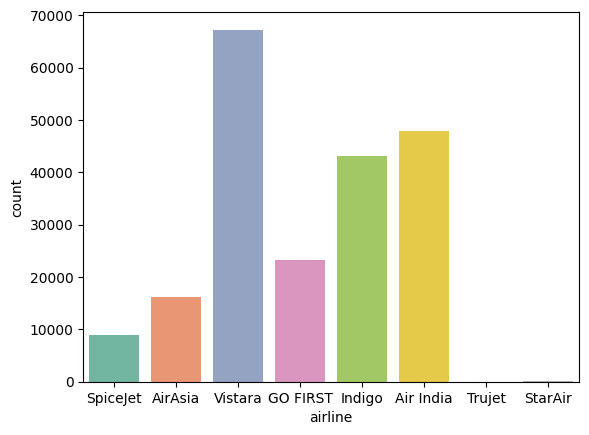

In [44]:
sns.countplot(df_new, x= categorical_feature[1], palette='Set2')

#Explore More Visualization

<Axes: xlabel='dep_hr', ylabel='Count'>

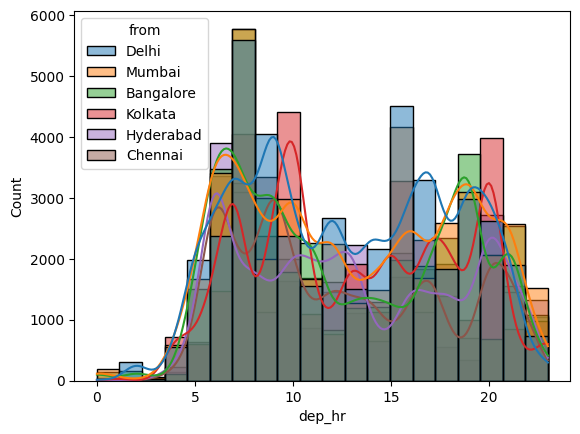

In [46]:
## Explore More Visualization
sns.histplot(data=df_new,x='dep_hr',bins=20,kde=True,color='g',hue='from')

<Axes: xlabel='arr_hr', ylabel='Count'>

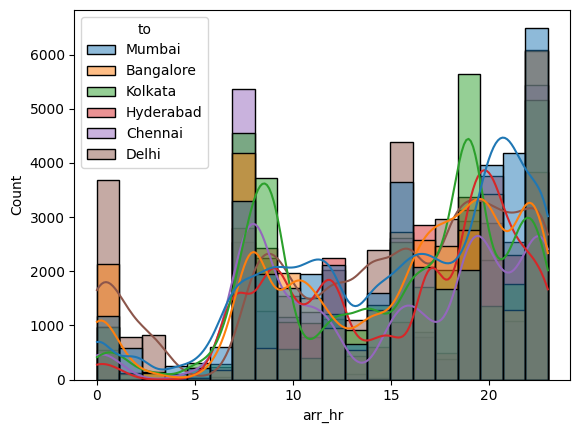

In [47]:
sns.histplot(data=df_new,x='arr_hr',bins=20,kde=True,color='g',hue='to')

<Axes: xlabel='price', ylabel='Count'>

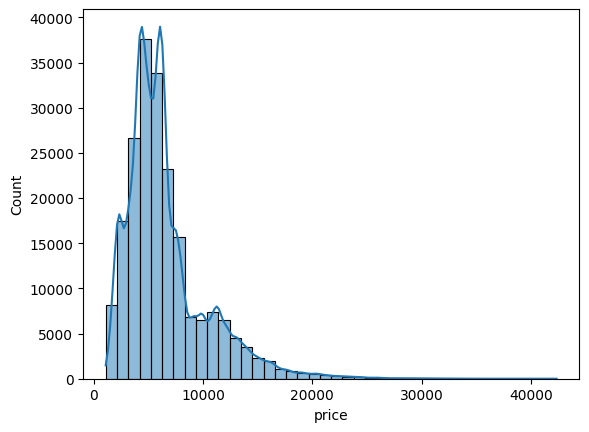

In [48]:
sns.histplot(data=df_new,x='price',bins=40,kde=True)

<Axes: xlabel='time_taken_hr', ylabel='Count'>

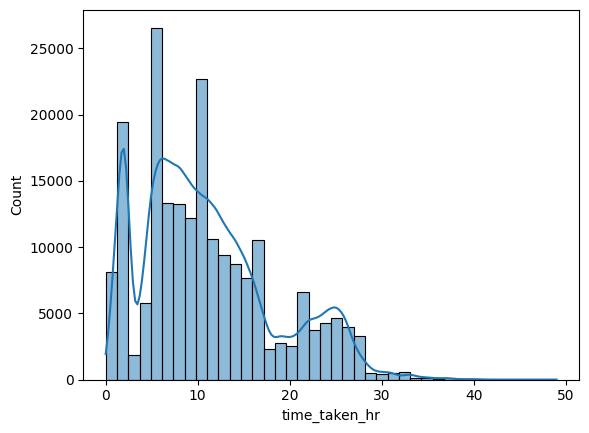

In [49]:
sns.histplot(data=df_new,x='time_taken_hr',bins=40,kde=True)

<Axes: xlabel='airline', ylabel='price'>

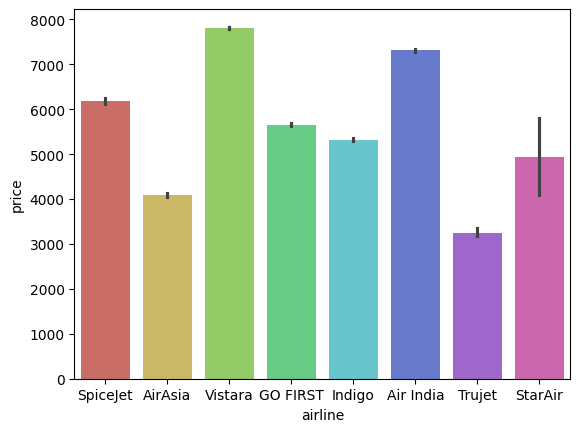

In [59]:
sns.barplot(x=df_new['airline'],y=df_new['price'], palette='hls')

<Axes: xlabel='airline', ylabel='count'>

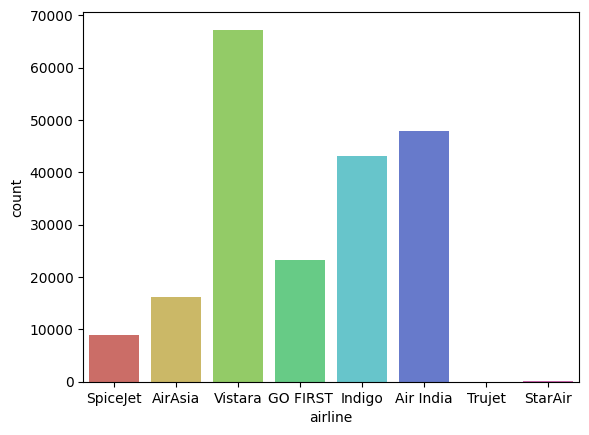

In [58]:
sns.countplot(x='airline',data=df_new, palette='hls')
## More no. of flights are under Vistara airline

<Axes: xlabel='from', ylabel='price'>

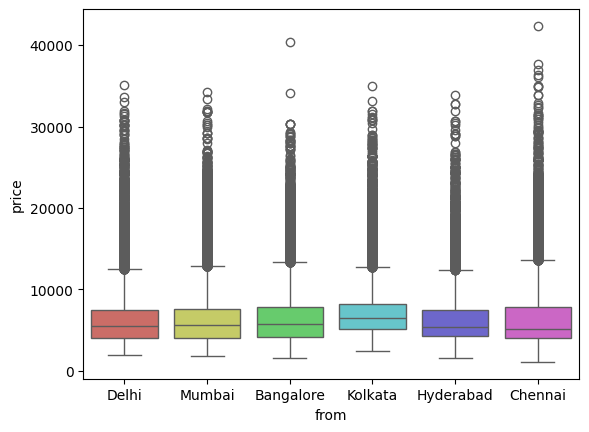

In [54]:
#How the price changes with change in Source city and Destination city?
sns.boxplot(x='from',y='price',data=df_new, palette='hls')

<Axes: xlabel='to', ylabel='price'>

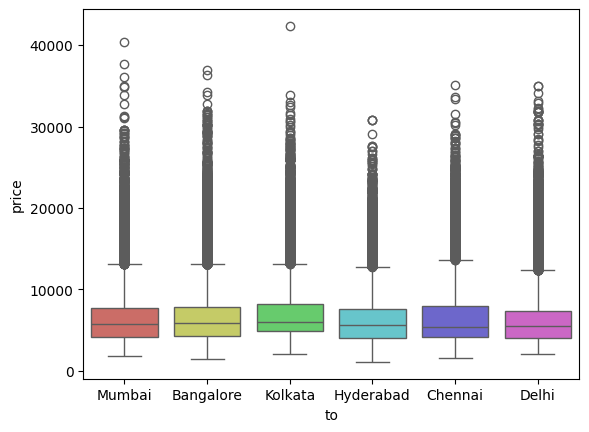

In [53]:

sns.boxplot(x='to',y='price',data=df_new,palette='hls')

##Feature engineering:
Extracting the best/ most relevant features through two ways: Pearsons Correlation and kBest Features.

1. Pearsons correlation:
Pearson's correlation can be used as a feature engineering technique to identify and select the most relevant features for a machine learning model. By calculating the Pearson's correlation coefficient between each feature and the target variable, we can measure the linear relationship between the feature and the target and determine which features are most predictive of the target variable.

<Axes: >

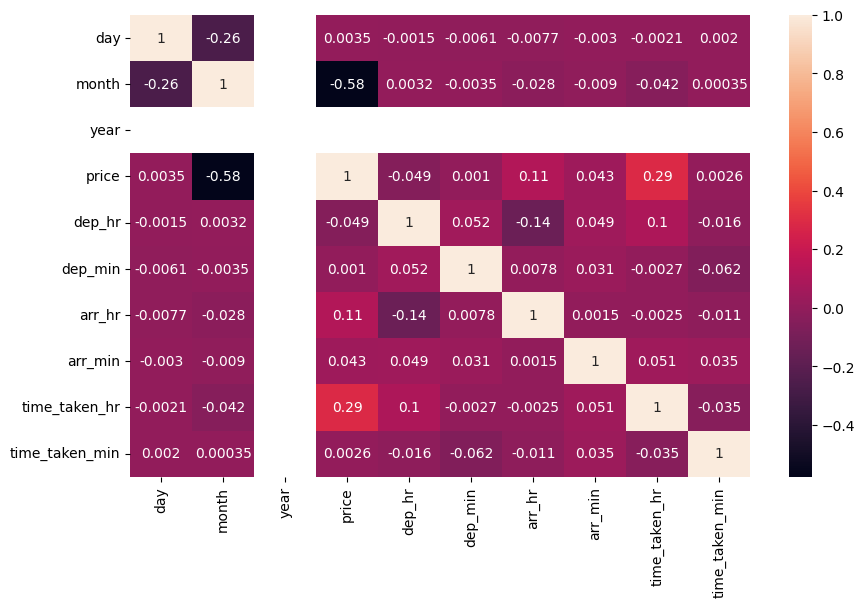

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),annot=True)

In [56]:
#Correlation with target variable price
cor = df_new.corr()
cor_target = abs(cor["price"])

relevant_features = cor_target
relevant_features.sort_values(ascending=False)

price             1.000000
month             0.576687
time_taken_hr     0.288341
arr_hr            0.113595
dep_hr            0.048822
arr_min           0.042783
day               0.003541
time_taken_min    0.002637
dep_min           0.001025
year                   NaN
Name: price, dtype: float64

According to Pearsons correlation, our top  relevant features are: month,time_taken_hr, arr_hr, dep_hr, arr_min

#2. Kbest Selection:
KBest feature selection is a technique in feature engineering that aims to select the k most important features from a dataset based on some statistical metric. The idea behind this technique is to reduce the dimensionality of the dataset by selecting only the most informative features, which can improve the performance of some machine learning models and reduce overfitting.

KBest feature selection works by ranking the features according to a statistical metric, such as the chi-squared test, mutual information, or f-score, and selecting the top k features with the highest scores. The specific metric used depends on the type of data and the problem at hand.



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Set 'price' as the target variable
y = df_new['price']

# Extract the input features
X_data = df_new.drop(['price','stop'], axis=1)

selector = SelectKBest(f_classif, k=4)
X_important = selector.fit_transform(X_data, y)

# Get a boolean mask of the selected features
mask = selector.get_support()

# Create a list of the selected feature names
important_feature_names = X_data.columns[mask]

print(important_feature_names)